# Importing Lake Bilancino Dataset

<img src="Lake_Bilancino_target.png" alt="Drawing" style="width: 40px; height: 30px;"/>

In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [154]:
df = pd.read_csv('acea-water-prediction\Lake_Bilancino.csv')
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


# Heat Map for Missing Data

<AxesSubplot:>

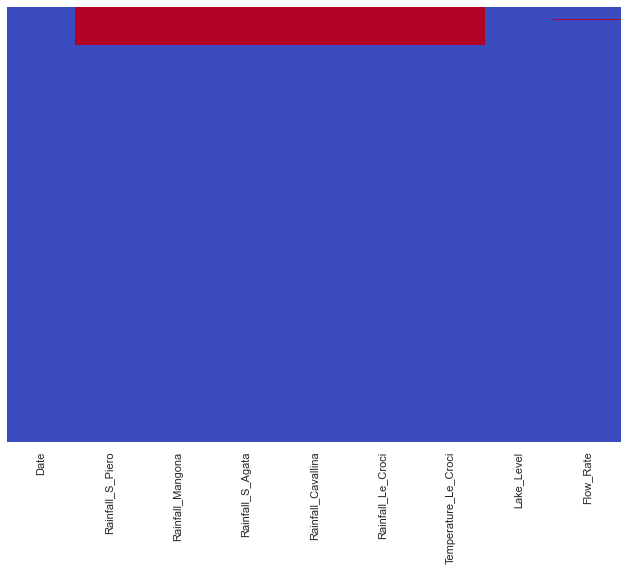

In [155]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

In [156]:
# modifying date column for time series analysis
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head().style.set_properties(subset=['Date'], **{'background-color': 'lightblue'})

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,2002-06-03 00:00:00,nan,nan,nan,nan,nan,nan,249.430000,0.310000
1,2002-06-04 00:00:00,nan,nan,nan,nan,nan,nan,249.430000,0.310000
2,2002-06-05 00:00:00,nan,nan,nan,nan,nan,nan,249.430000,0.310000
3,2002-06-06 00:00:00,nan,nan,nan,nan,nan,nan,249.430000,0.310000
4,2002-06-07 00:00:00,nan,nan,nan,nan,nan,nan,249.440000,0.310000


# Missing Data Analysis

In [157]:
pd.Series(df.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

,Missing Value Count
features/target,
Date,0
Rainfall_S_Piero,577
Rainfall_Mangona,577
Rainfall_S_Agata,577
Rainfall_Cavallina,577
Rainfall_Le_Croci,577
Temperature_Le_Croci,578
Lake_Level,0
Flow_Rate,21


In [158]:
#dropping rows before 2004 due to NaN values in multiple columns
df = df[df.Temperature_Le_Croci.notna()].reset_index(drop=True)
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,2004-01-02,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
1,2004-01-03,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2,2004-01-04,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
3,2004-01-05,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
4,2004-01-06,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


In [159]:
# Missing data analysis after dropping rows
pd.Series(df.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

,Missing Value Count
features/target,
Date,0
Rainfall_S_Piero,0
Rainfall_Mangona,0
Rainfall_S_Agata,0
Rainfall_Cavallina,0
Rainfall_Le_Croci,0
Temperature_Le_Croci,0
Lake_Level,0
Flow_Rate,0


In [160]:
df.shape

(6025, 9)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6025 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6025 non-null   float64       
 2   Rainfall_Mangona      6025 non-null   float64       
 3   Rainfall_S_Agata      6025 non-null   float64       
 4   Rainfall_Cavallina    6025 non-null   float64       
 5   Rainfall_Le_Croci     6025 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6025 non-null   float64       
 8   Flow_Rate             6025 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 423.8 KB


In [162]:
print('Starting date is :' , df['Date'].iloc[0],
      '\nEnding Date is : ',df["Date"].iloc[-1])

Starting date is : 2004-01-02 00:00:00 
Ending Date is :  2020-06-30 00:00:00


# Correlation Analysis

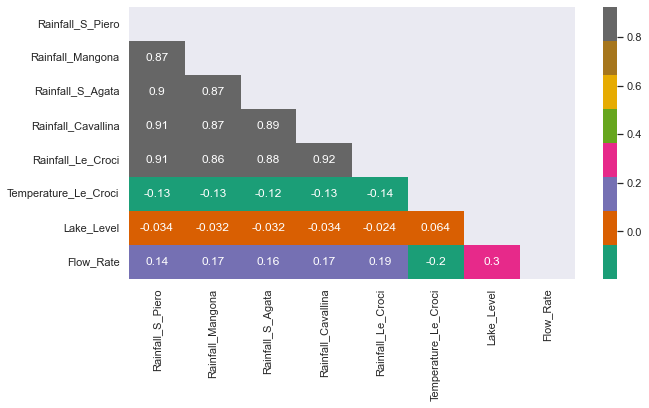

In [163]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

Rainfall at different place is highly correlated to themself where as Lake level and flow rate is having less correlation.

In [164]:
corr1 = df.drop(['Lake_Level'],axis = 1)
correlation = pd.DataFrame(corr1.corr().Flow_Rate).style.background_gradient(cmap='Dark2_r')
correlation

,Flow_Rate
Rainfall_S_Piero,0.142212
Rainfall_Mangona,0.166188
Rainfall_S_Agata,0.158860
Rainfall_Cavallina,0.172770
Rainfall_Le_Croci,0.186994
Temperature_Le_Croci,-0.195136
Flow_Rate,1.000000


In [165]:
corr2 = df.drop(['Flow_Rate'],axis = 1)
correlation2 = pd.DataFrame(corr2.corr().Lake_Level).style.background_gradient(cmap='Dark2_r')
correlation2

,Lake_Level
Rainfall_S_Piero,-0.034109
Rainfall_Mangona,-0.032220
Rainfall_S_Agata,-0.032222
Rainfall_Cavallina,-0.033917
Rainfall_Le_Croci,-0.024466
Temperature_Le_Croci,0.063569
Lake_Level,1.000000


In [166]:
#Correlation Analysis among two targets
df['Lake_Level'].corr(df['Flow_Rate'])

0.29883267390135204

<AxesSubplot:>

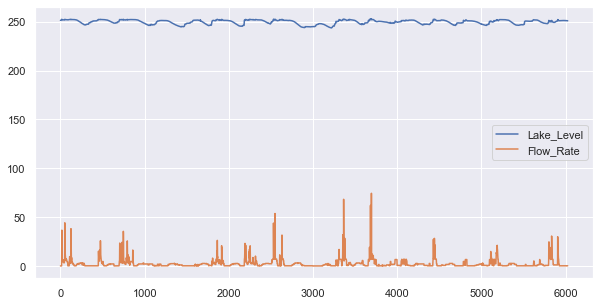

In [167]:
df[['Lake_Level','Flow_Rate']].plot(figsize=(10,5))

Both targets Lake level and Flow rate are having very less correlation.

# Choronology Check

In [168]:
df = df.sort_values(by='Date')

# Check time intervals
df['Diff'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Diff']].head()

,Date,Diff
0,2004-01-02,NaT
1,2004-01-03,1 days
2,2004-01-04,1 days
3,2004-01-05,1 days
4,2004-01-06,1 days


In [169]:
df['Diff'].value_counts()

1 days    6024
Name: Diff, dtype: int64

In [170]:
df = df.drop('Diff', axis=1)

The time interval is one day and the data is already in chronological order.

# Visualization of Features and Targets

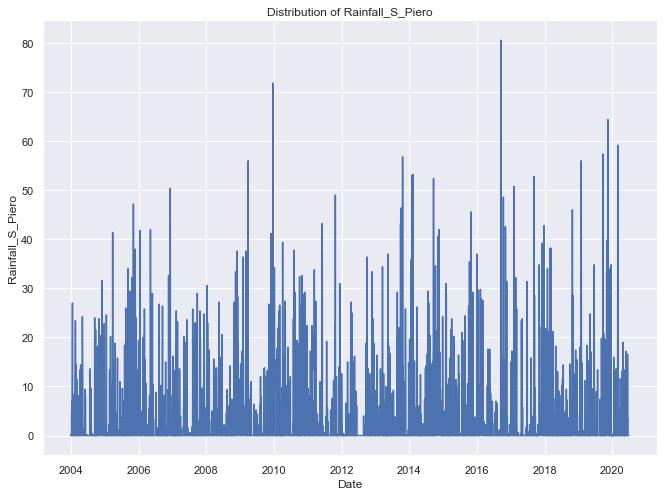

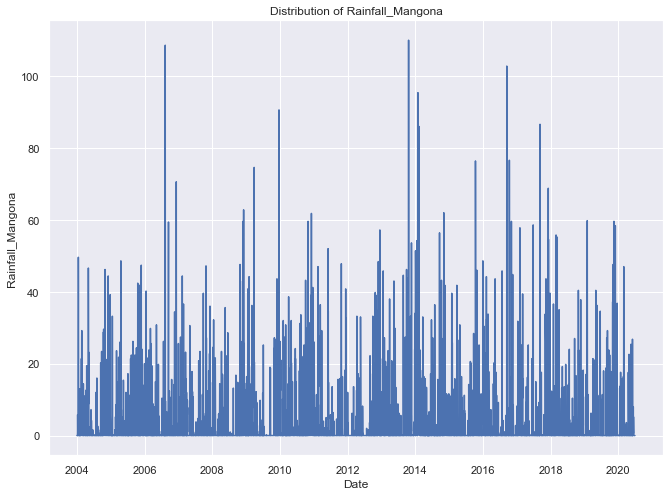

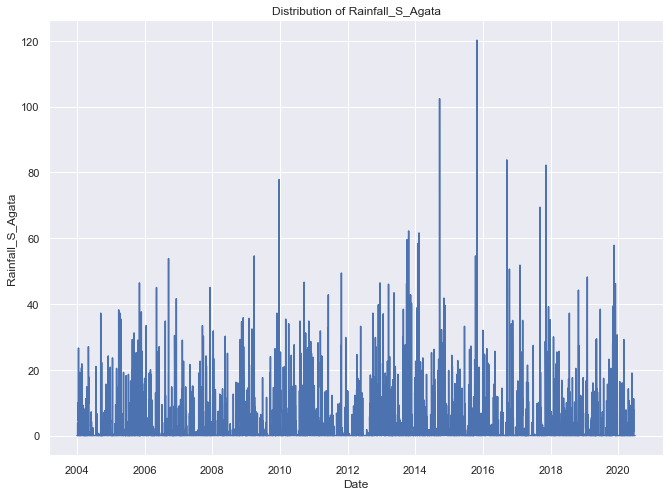

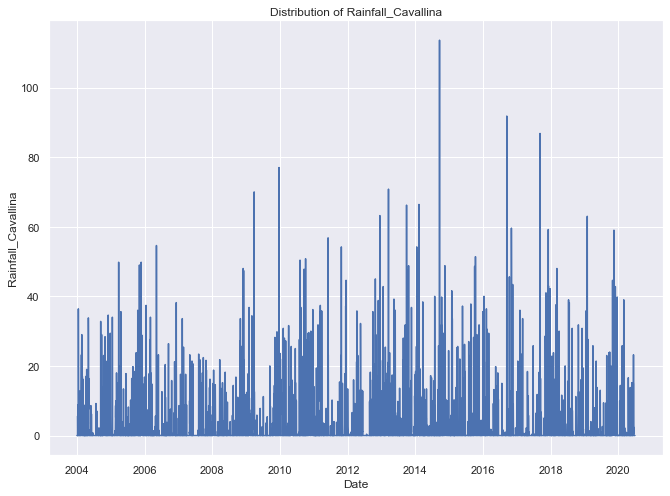

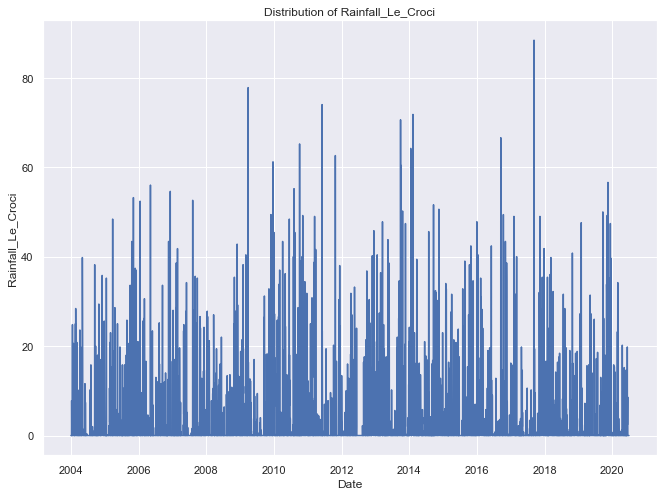

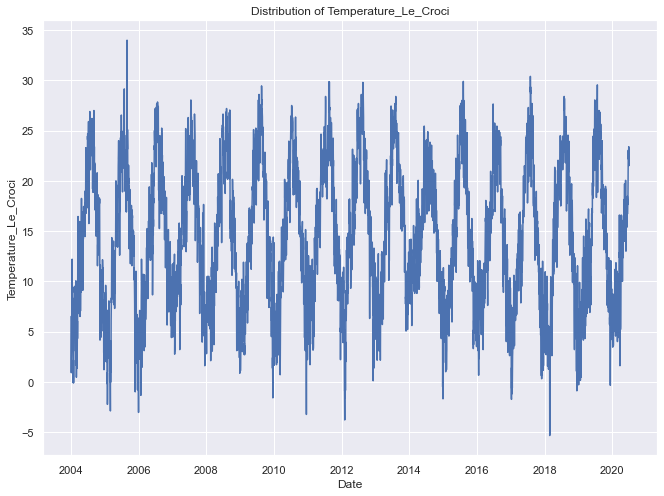

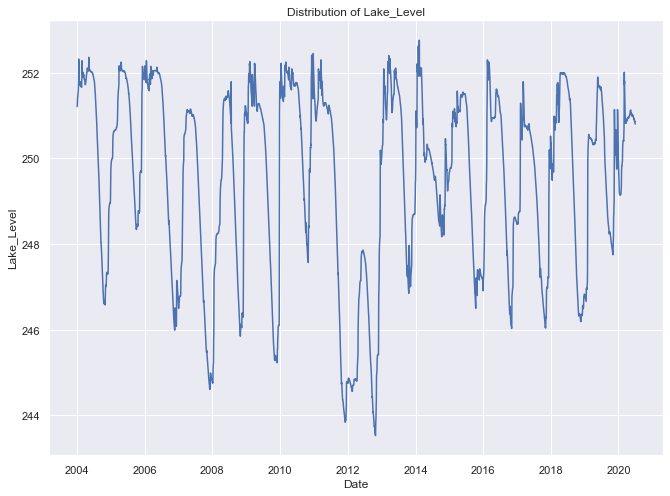

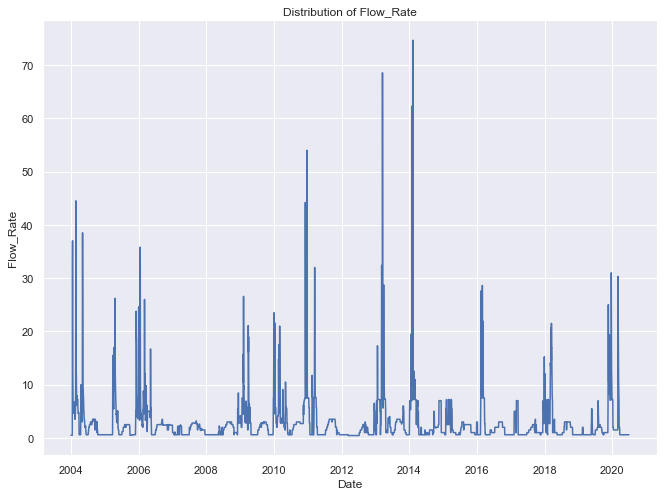

In [171]:
for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column])
    My_Title = "Distribution of " + df.columns[i+1]
    plt.title(My_Title)
    plt.show()

# Resampling

In [172]:
downsampled = df[['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
                   'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
                   'Lake_Level', 'Flow_Rate']].resample('7D', on='Date').mean().reset_index(drop=False)

df = downsampled

In [175]:
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,2004-01-02,0.028571,0.114286,0.000000,0.000000,0.000000,3.300000,251.358571,0.500000
1,2004-01-09,1.971429,3.314286,2.257143,2.714286,2.571429,7.785714,251.557143,0.500000
2,2004-01-16,7.142857,14.457143,7.342857,9.628571,6.771429,5.121429,251.995714,18.700000
3,2004-01-23,1.828571,1.542857,1.314286,1.542857,2.114286,1.542857,251.787143,5.657143
4,2004-01-30,2.971429,2.000000,2.742857,4.628571,3.542857,4.185714,251.738571,5.200000


# Resampled Data Line Plot

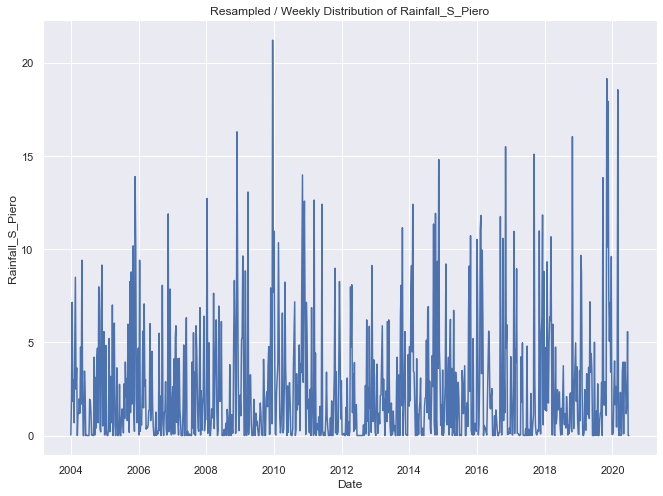

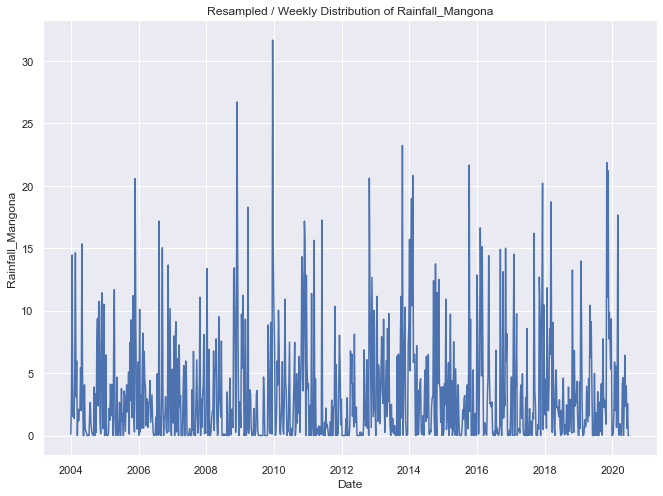

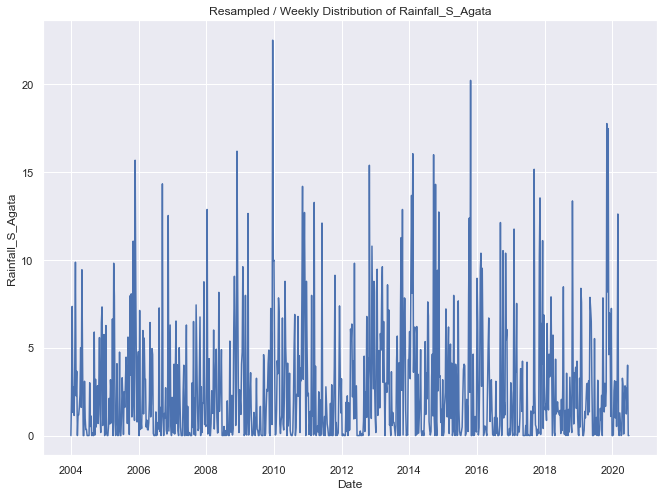

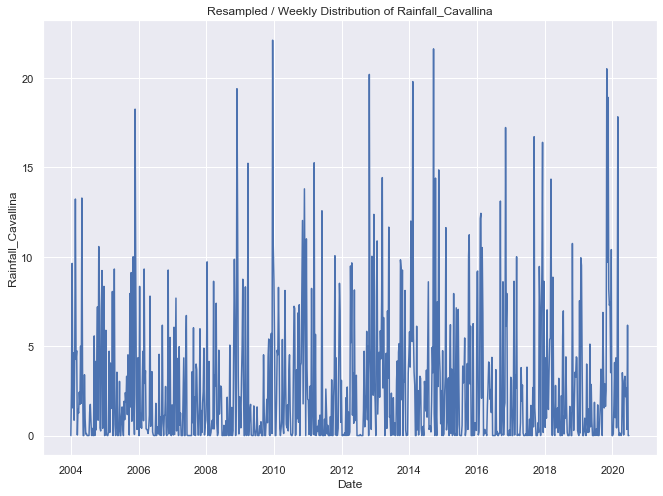

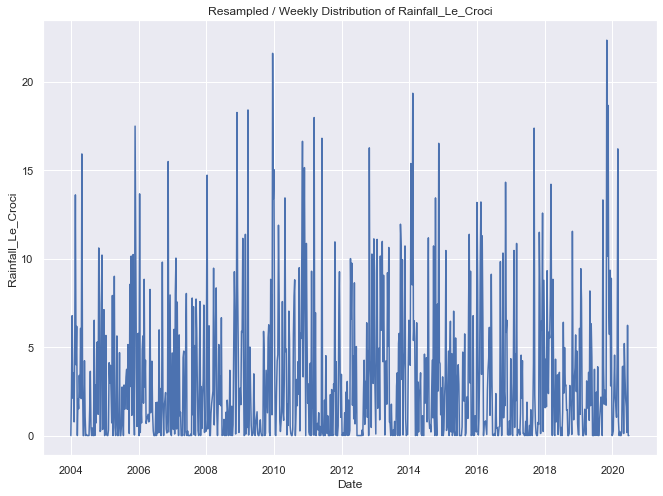

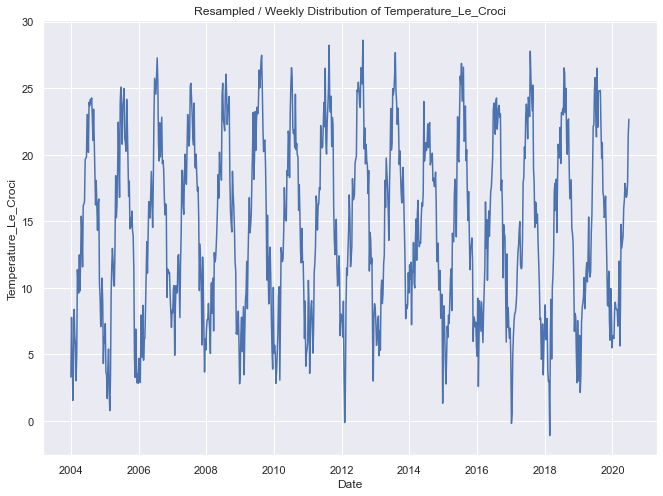

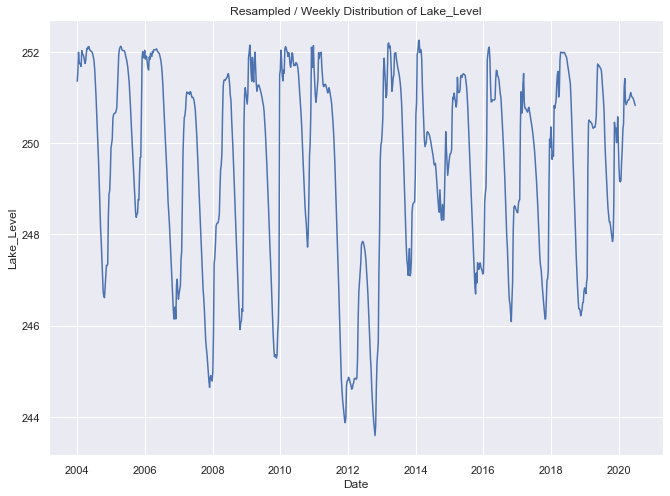

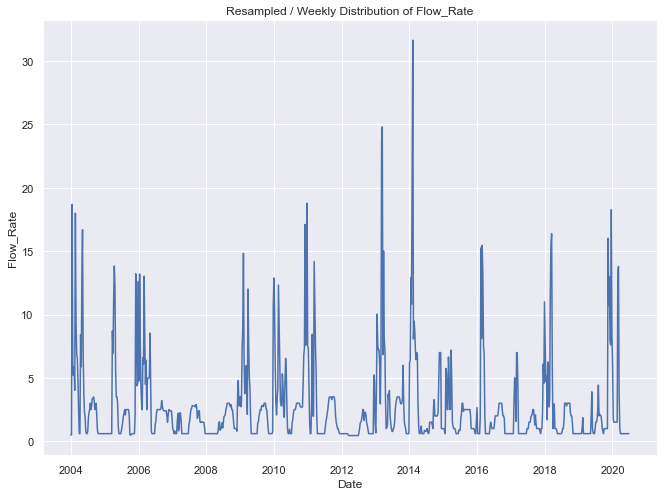

In [176]:
for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column])
    My_Title = "Resampled / Weekly Distribution of " + df.columns[i+1]
    plt.title(My_Title)
    plt.show()

# Training and Test Data Creation

In [177]:
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.model_selection import cross_val_score

In [178]:
def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
   
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    
    tscv = TimeSeriesSplit(n_splits=3) 
    
    
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [181]:
def timeseries_train_test_split(X, y, test_size):
   
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [182]:
X_ar = df[['Date']]
X = df.drop(['Lake_Level', 'Flow_Rate'],axis = 1)
y = df[['Lake_Level', 'Flow_Rate']]

# Split for XGBRegressor Model

In [183]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

In [184]:
y_train_Lake_Level = y_train[['Lake_Level']]
y_train_Flow_Rate = y_train[['Flow_Rate']]
y_test_Lake_Level = y_test[['Lake_Level']]
y_test_Flow_Rate = y_test[['Flow_Rate']]